## Visualize the results of the KS-test

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))

In [2]:
output_fig_dir <- "figures"

ks_test_fig <- file.path(output_fig_dir, "ks_test_cp_genotype.png")
actin_distrib_fig <- file.path(output_fig_dir, "top_actin_feature_distrib.png")

In [3]:
# Load and process KS-test data
ks_file <- file.path("data", "nf1_kstest_two_sample_results.csv")
ks_df <- readr::read_csv(ks_file, col_types = readr::cols(.default="d", Features="c"))

# Create a new column for a directional ks-test statistic
# Arrange by statistic
# Split out components of feature name for visualization
ks_df <- ks_df %>%
    dplyr::mutate(signed_statistic = statistic * statistic_sign) %>%
    dplyr::arrange(desc(statistic)) %>%
    tidyr::separate(
        Features,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)

# Clean channel for visualization
ks_df$channel_cleaned <-
    dplyr::recode(
        ks_df$channel_cleaned,
        "DAPI" = "nuclei",
        "RFP" = "actin",
        "GFP" = "ER",
        .default = "other",
        .missing="other"
    )

print(dim(ks_df))
head(ks_df, 10)

Warning message:
“Expected 6 pieces. Additional pieces discarded in 312 rows [17, 18, 20, 26, 28, 32, 35, 36, 40, 44, 46, 50, 55, 56, 59, 68, 71, 83, 88, 89, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 731 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 21, 22, 23, ...].”


[1] 1043   13


Features,compartment,feature_group,measurement,channel,parameter1,parameter2,statistic,pvalue,statistic_location,statistic_sign,signed_statistic,channel_cleaned
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Cells_Neighbors_SecondClosestDistance_50,Cells,Neighbors,SecondClosestDistance,50,NA,NA,0.6590909,3.157514e-11,-0.01919802,-1,-0.6590909,other
Cells_Neighbors_SecondClosestDistance_Adjacent,Cells,Neighbors,SecondClosestDistance,Adjacent,NA,NA,0.6590909,3.157514e-11,-0.01919802,-1,-0.6590909,other
Nuclei_Neighbors_FirstClosestObjectNumber_50,Nuclei,Neighbors,FirstClosestObjectNumber,50,NA,NA,0.6507315,5.530873e-11,-0.48737975,1,0.6507315,other
Cytoplasm_Intensity_MeanIntensity_DAPI,Cytoplasm,Intensity,MeanIntensity,DAPI,NA,NA,0.6415883,1.438159e-10,-0.39663099,1,0.6415883,nuclei
Cells_Intensity_StdIntensity_DAPI,Cells,Intensity,StdIntensity,DAPI,NA,NA,0.6287879,3.718810e-10,-0.18999521,1,0.6287879,nuclei
Cells_Granularity_2_DAPI,Cells,Granularity,2,DAPI,NA,NA,0.6120690,1.131268e-09,-0.57010442,-1,-0.6120690,nuclei
Cytoplasm_Intensity_MedianIntensity_DAPI,Cytoplasm,Intensity,MedianIntensity,DAPI,NA,NA,0.6029258,2.546726e-09,-0.53336925,1,0.6029258,nuclei
Cells_Intensity_MeanIntensity_DAPI,Cells,Intensity,MeanIntensity,DAPI,NA,NA,0.5812435,1.229483e-08,-0.37834465,1,0.5812435,nuclei
Nuclei_Granularity_1_RFP,Nuclei,Granularity,1,RFP,NA,NA,0.5726228,2.210272e-08,-0.39494563,1,0.5726228,actin


In [4]:
# Load feature data
data_dir <-file.path("..", "..", "..", "4_processing_features", "data")
cp_file <- file.path(data_dir, "nf1_sc_norm_cellprofiler.csv.gz")

cp_df <- readr::read_csv(
    cp_file,
    col_types = readr::cols(
        .default="d",
        Metadata_WellRow="c",
        Metadata_WellCol="c",
        Metadata_Well="c",
        Metadata_gene_name="c",
        Metadata_genotype="c"
    )
)

print(dim(cp_df))
head(cp_df, 3)

New names:
• `` -> `...1`


[1]  149 1056


...1,Metadata_WellRow,Metadata_WellCol,Metadata_number_of_singlecells,Metadata_gene_name,Metadata_genotype,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_Cytoplasm_Parent_Cells,⋯,Nuclei_Texture_SumVariance_RFP_3_02_256,Nuclei_Texture_SumVariance_RFP_3_03_256,Nuclei_Texture_Variance_GFP_3_00_256,Nuclei_Texture_Variance_GFP_3_01_256,Nuclei_Texture_Variance_GFP_3_02_256,Nuclei_Texture_Variance_GFP_3_03_256,Nuclei_Texture_Variance_RFP_3_00_256,Nuclei_Texture_Variance_RFP_3_01_256,Nuclei_Texture_Variance_RFP_3_02_256,Nuclei_Texture_Variance_RFP_3_03_256
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,C,6,12,NF1,WT,1,1,C6,1,⋯,3.1415403,3.2022729,-0.09735552,-0.096165089,-0.09420230,-0.10645635,3.3379688,3.3505284,3.2781681,3.3103705
1,C,6,12,NF1,WT,1,1,C6,2,⋯,0.3159240,0.2586328,-0.08797075,-0.069492845,-0.06553894,-0.09537677,0.3147762,0.3139198,0.3484196,0.3186928
2,C,6,12,NF1,WT,1,1,C6,3,⋯,0.2952335,0.3831610,0.06525064,0.005549586,-0.01521187,-0.02908654,0.3484921,0.3339402,0.3413119,0.3479994


## Visualize KS test

In [5]:
# Determine a bonferroni adjusted alpha value threshold
alpha <- 0.05
bon_alpha <- alpha / dim(ks_df)[1]
bon_alpha

[1] 4.793864e-05

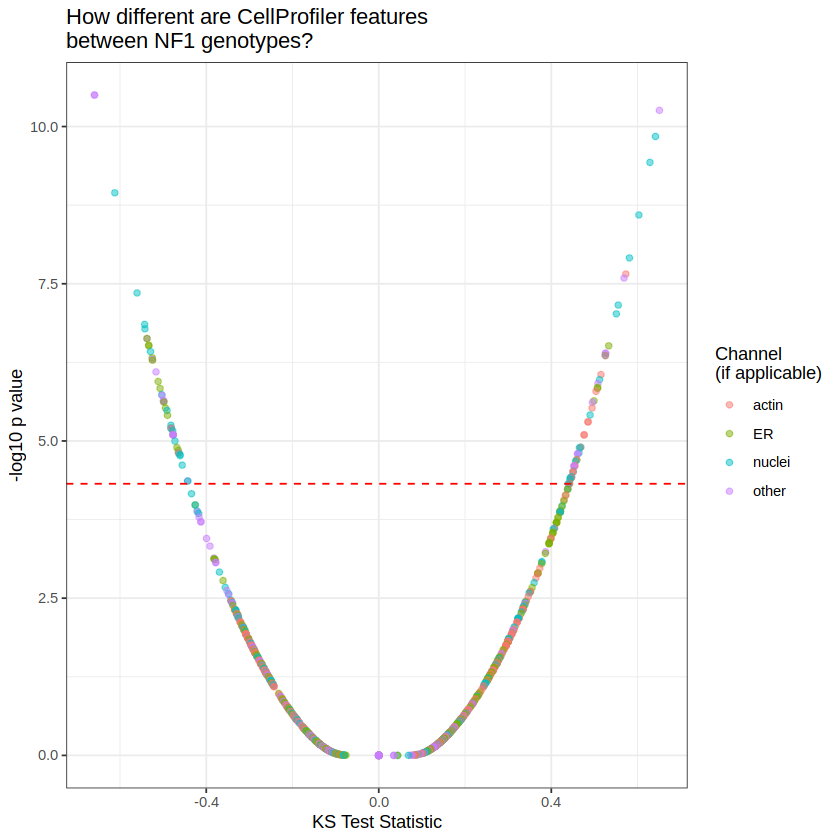

In [6]:
ks_test_gg <- (
    ggplot(ks_df, aes(x = signed_statistic, y = -log10(pvalue)))
    + geom_point(alpha = 0.5, aes(color=channel_cleaned))
    + geom_hline(yintercept=-log10(bon_alpha), linetype = "dashed", color = "red")
    + theme_bw()
    + xlab("KS Test Statistic")
    + ylab("-log10 p value")
    + ggtitle("How different are CellProfiler features\nbetween NF1 genotypes?")
    + guides(color = guide_legend(title = "Channel\n(if applicable)"))
)

ks_test_gg

In [7]:
# Output figure
ggsave(ks_test_fig, ks_test_gg, dpi = 500, height = 6, width = 6)

## Visualize distribution of top actin feature

In [8]:
top_actin_feature <- ks_df %>%
    dplyr::filter(channel_cleaned == "actin") %>%
    dplyr::select(Features)

top_actin_feature <- head(top_actin_feature, 1) %>% dplyr::pull(Features)
top_actin_feature

[1] "Nuclei_Granularity_1_RFP"

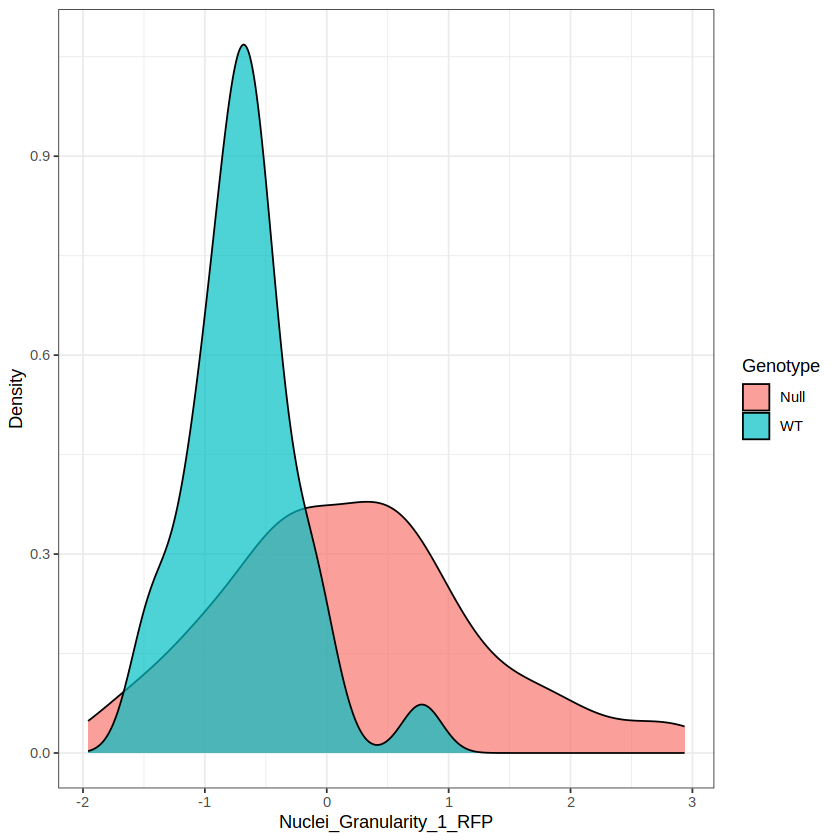

In [9]:
top_actin_feature_gg = (
    ggplot(cp_df, aes(x = .data[[top_actin_feature]]))
    + geom_density(aes(fill = Metadata_genotype), alpha = 0.7)
    + theme_bw()
    + ylab("Density")
    + guides(fill = guide_legend(title = "Genotype"))
)

top_actin_feature_gg

In [10]:
# Output figure
ggsave(actin_distrib_fig, top_actin_feature_gg, dpi = 500, height = 6, width = 6)